## AMIR SADIEV 

## Plotting Titanic Dataset

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from io import StringIO

import pandas as pd

In [6]:
titanic = pd.read_excel("../data/titanic.xls", "titanic")
df = titanic
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### 1. Create a bar chart for number of passengers survived by class

## I want to display the count of each death vs survived by gender so i can assure my graph data is accurate

In [7]:
table = pd.crosstab(df['survived'], df['sex'])
table

sex,female,male
survived,,
0,127,682
1,339,161



## I want to print the count of each class death vs survived so i can assure my graph is accurate


In [8]:
aliveOrDied = pd.crosstab(index=titanic["survived"], columns=titanic["pclass"])
aliveOrDied.columns = ["pclass1", "pclass2", "pclass3"] #rename 1 to pclass1 and 2 to pclass2 
aliveOrDied.index= ["died (aka 0)","survivedcount (aka 1)"] #rename 0 to died and 1 to survivedcount
aliveOrDied

,pclass1,pclass2,pclass3
died (aka 0),123,158,528
survivedcount (aka 1),200,119,181


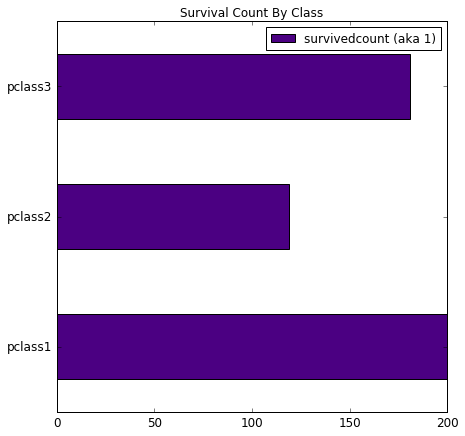

In [9]:
survivedRow=aliveOrDied.iloc[1]
survivedRow.plot(kind = 'barh', color = 'indigo', title="Survival Count By Class", figsize = (7,7), legend = True, fontsize = 12)
plt.show()

## The bottom graph below is just me tweaking the bars to see class vs death vs survial count in one graph

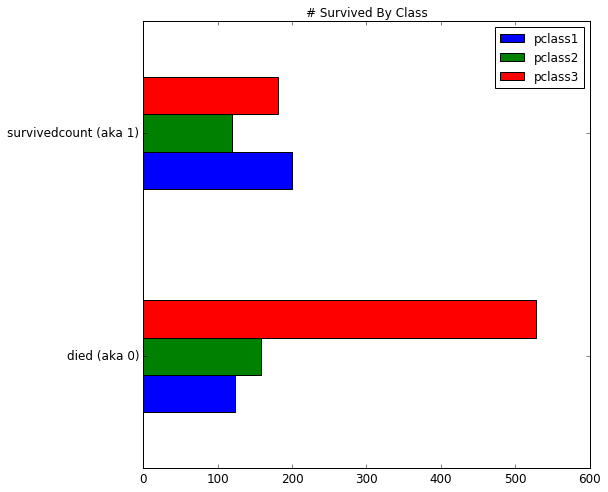

In [10]:
aliveOrDied.plot.barh(title="# Survived By Class", figsize = (8,8), legend = True, fontsize = 12)
plt.show()

#### 2. Create a vertical bar chart for passengers survived by class and gender

In [40]:
survived_byClass_byGender = pd.crosstab(index=titanic["survived"], 
                             columns=[titanic["pclass"],
                                      titanic["sex"]])
survived_byClass_byGender

pclass        1           2           3     
sex      female male female male female male
survived                                    
0             5  118     12  146    110  418
1           139   61     94   25    106   75

## The chart above is to make sure my data below looks accurate

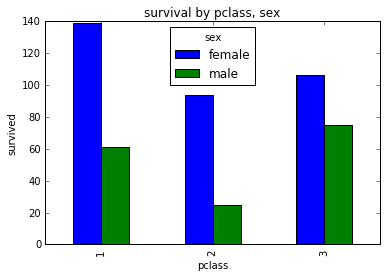

In [98]:
dfk = df.groupby(['pclass', 'sex'])
dfk['survived'].count()

dfo.plot(kind='bar', title = 'survival by pclass, sex')
plt.ylabel('survived')
plt.show()

## Display survived by class and sex

#### 3. Create a stacked chart survived vs dead for different classes and gender

## I am dispalying a chart for myself to make sure the data is correct when I plot it

In [37]:
classgendersurvived = pd.crosstab(index=[titanic["survived"],titanic["pclass"]], 
                             columns=[titanic["sex"]])
classgendersurvived

sex              female  male
survived pclass              
0        1            5   118
         2           12   146
         3          110   418
1        1          139    61
         2           94    25
         3          106    75

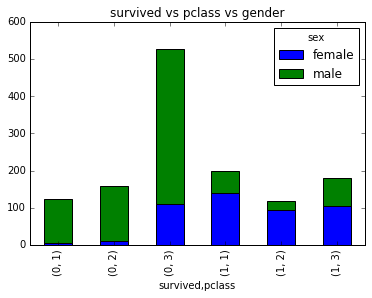

In [14]:
classgendersurvived.plot.bar(stacked=True, title = "survived vs pclass vs gender")

#### 4. Plot histogram of fares paid for passengers bins = 30

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4923083dd0>]], dtype=object)

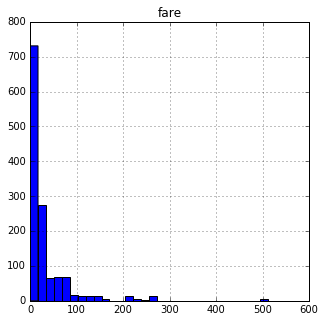

In [15]:
df.hist(column = 'fare', figsize =(5,5), bins = 30)

#### 5.Create a KDE vs bar plot of the fare

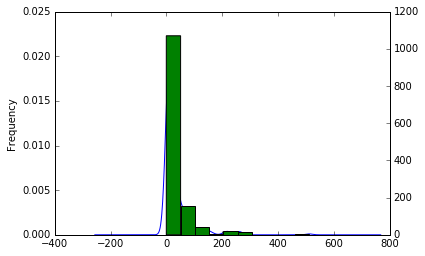

In [16]:
ax = df.fare.plot(kind='kde')
df.fare.plot(kind='hist', secondary_y=True)

#### 6. Create a box plot of the fares by passenger class

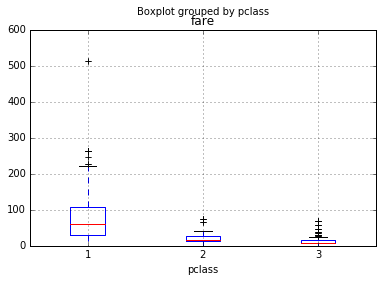

In [17]:
a_df =titanic[['pclass', 'fare']]
a_df.boxplot(column='fare', by='pclass')

#### 7. Create a box plot of the age by passenger class

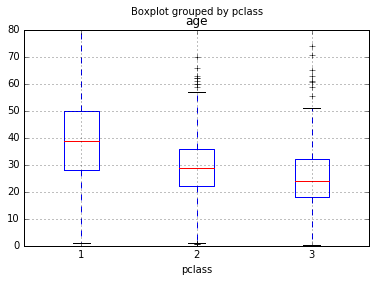

In [18]:
a_df =titanic[['pclass', 'age']]
a_df.boxplot(column='age', by='pclass')

#### Try Plotly to do all of the above

# The below chart is just for me I was tweaking with the survival amount between males and females. As you can see the bottom lower bar between the two is a hybrid color between yellow and pink which it shouldn't be. 

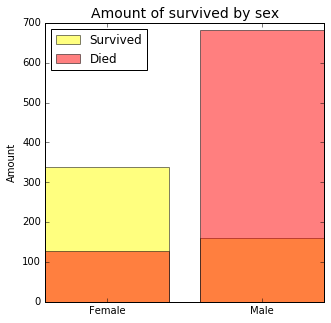

In [99]:
survivedByGender = table.iloc[1]
diedByGender = table.iloc[0]

genders = ['Female', 'Male']

f, (ax1) = plt.subplots(1, figsize=(5,5))
# stacked bar chart for amount of survived/died by gender
ax1.bar(range(len(survivedByGender)), survivedByGender, label='Survived', alpha=0.5, color='yellow')
ax1.bar(range(len(diedByGender)), diedByGender, label='Died', alpha=0.5, color='red')
plt.sca(ax1)
plt.xticks([0.4, 1.4], genders)
ax1.set_ylabel("Amount")
ax1.set_title("Amount of survived by sex",fontsize=14)
plt.legend(loc='upper left') 
